In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from prophet import Prophet
df = pd.read_csv('../data/AirPassengers.csv')
df['Month'] = pd.to_datetime(df['Month'])
df.columns = ['ds', 'y']

/Users/oksjjj/coding/prophet/.venv/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Importing plotly failed. Interactive plots will not work.


In [2]:
df.head()

,ds,y
0,1949-01-01,112
1,1949-02-01,118
2,1949-03-01,132
3,1949-04-01,129
4,1949-05-01,121


07:19:57 - cmdstanpy - INFO - Chain [1] start processing
07:19:57 - cmdstanpy - INFO - Chain [1] done processing


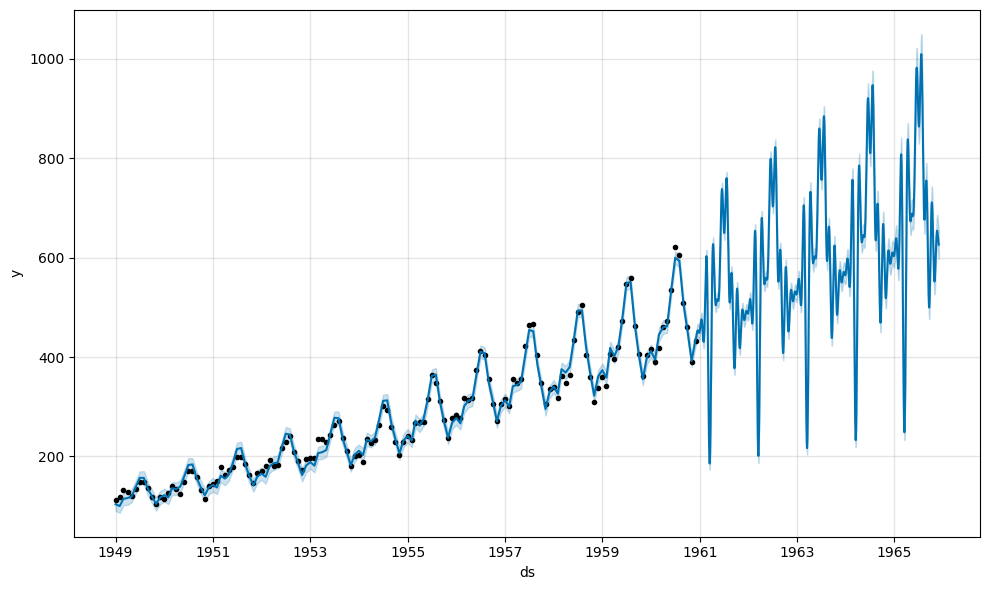

In [3]:
model = Prophet(seasonality_mode='multiplicative')
model.fit(df)
future = model.make_future_dataframe(periods=365*5)
forecast = model.predict(future)
fig = model.plot(forecast)
plt.show()

07:19:57 - cmdstanpy - INFO - Chain [1] start processing
07:19:57 - cmdstanpy - INFO - Chain [1] done processing


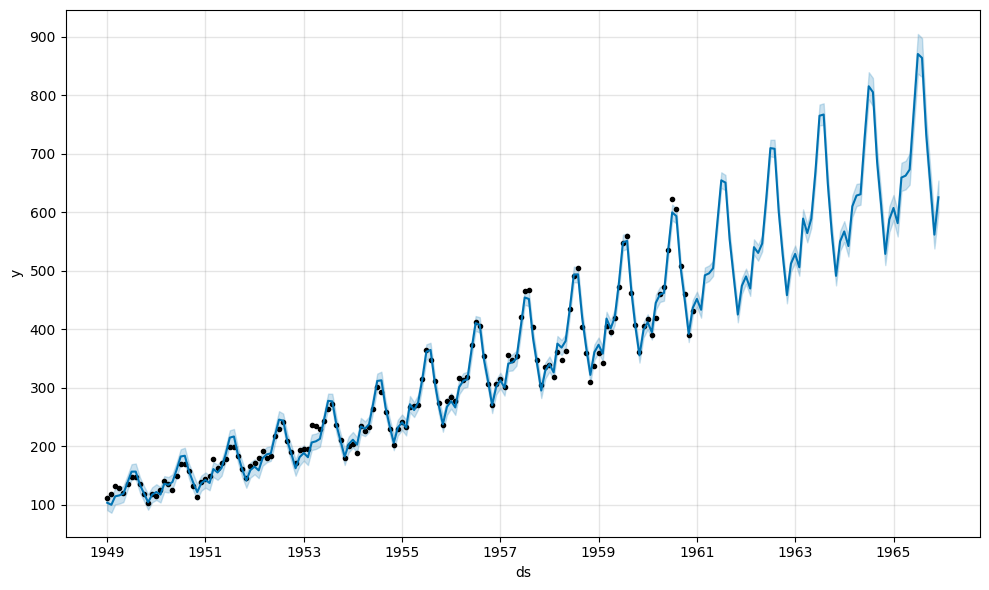

In [4]:
model = Prophet(seasonality_mode='multiplicative')
model.fit(df)
future = model.make_future_dataframe(periods=12*5, freq='MS')
forecast = model.predict(future)
fig = model.plot(forecast)
plt.show()

In [5]:
data = pd.read_csv('../data/divvy_hourly.csv')
df = pd.DataFrame({'ds': pd.to_datetime(data['date']),
                   'y': data['rides']})
df.head()

,ds,y
0,2014-01-01 01:00:00,1
1,2014-01-01 02:00:00,9
2,2014-01-01 03:00:00,4
3,2014-01-01 04:00:00,1
4,2014-01-01 07:00:00,2


In [6]:
model = Prophet(seasonality_mode='multiplicative')
model.fit(df)
future = model.make_future_dataframe(periods=365*24,
                                     freq='h')

07:19:59 - cmdstanpy - INFO - Chain [1] start processing
07:20:09 - cmdstanpy - INFO - Chain [1] done processing


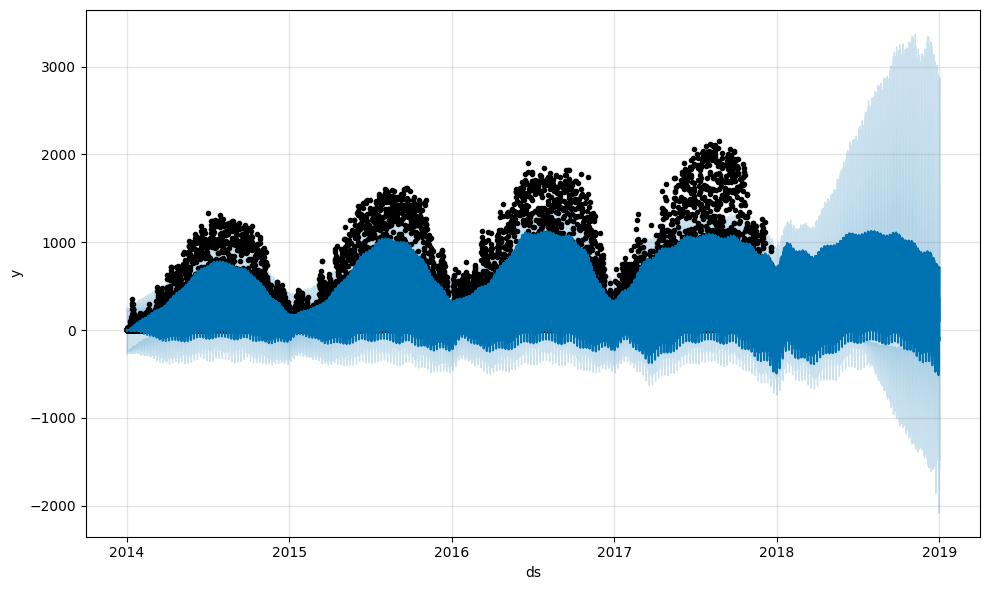

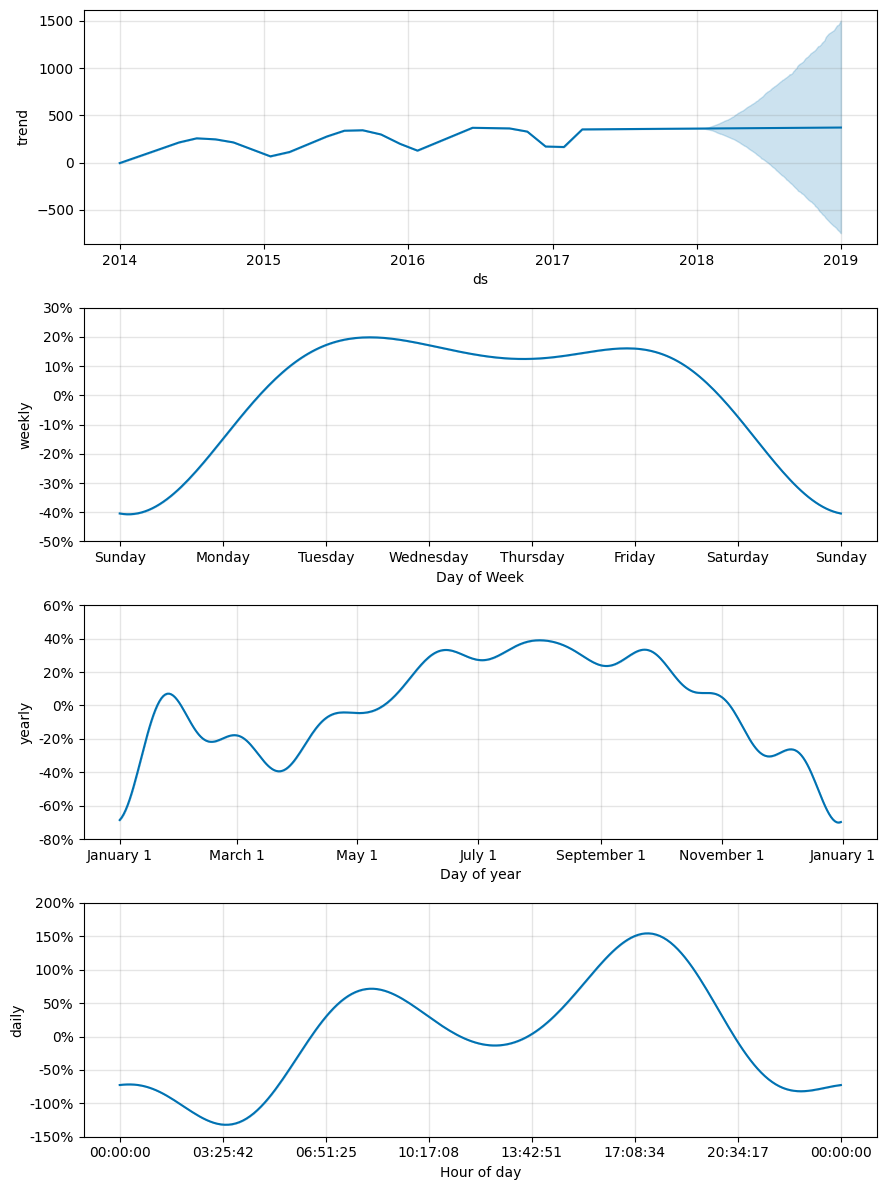

In [7]:
forecast = model.predict(future)
fig = model.plot(forecast)
plt.show()
fig2 = model.plot_components(forecast)
plt.show()

In [8]:
df = df[ (df['ds'].dt.hour >= 8) & \
         (df['ds'].dt.hour < 18)]

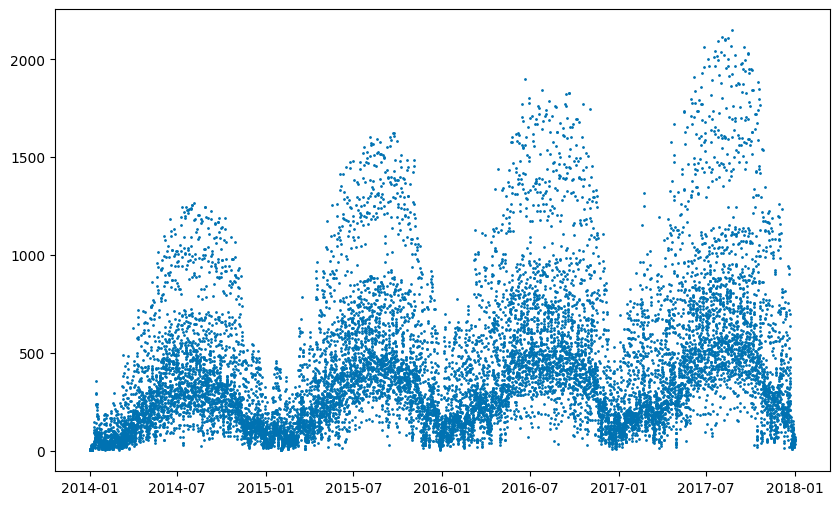

In [9]:
plt.figure(figsize=(10,6))
plt.scatter(x=df['ds'], y=df['y'], s=1, c='#0072B2')
plt.show()

07:20:14 - cmdstanpy - INFO - Chain [1] start processing
07:20:20 - cmdstanpy - INFO - Chain [1] done processing


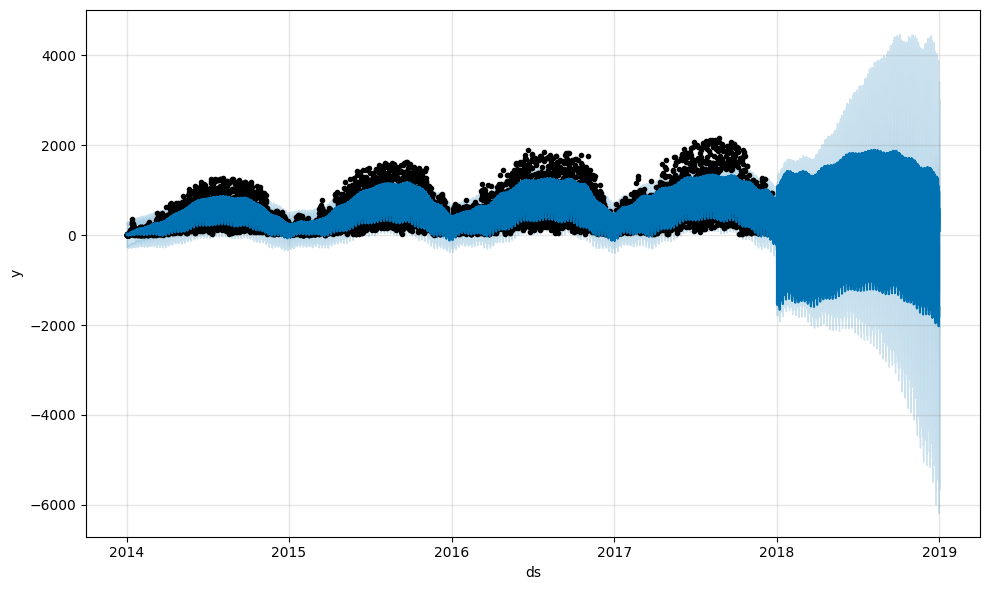

In [10]:
model = Prophet(seasonality_mode='multiplicative')
model.fit(df)
future = model.make_future_dataframe(periods=365*24,
                                     freq='h')
forecast = model.predict(future)
fig = model.plot(forecast)
plt.show()

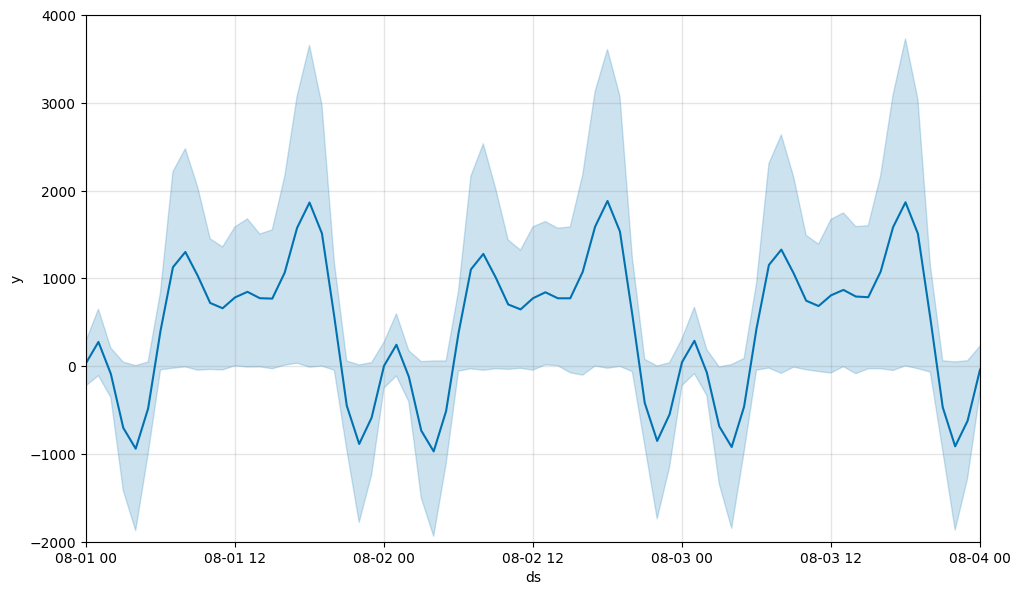

In [11]:
fig = model.plot(forecast)
plt.xlim(pd.to_datetime(['2018-08-01', '2018-08-04']))
plt.ylim(-2000, 4000)
plt.show()

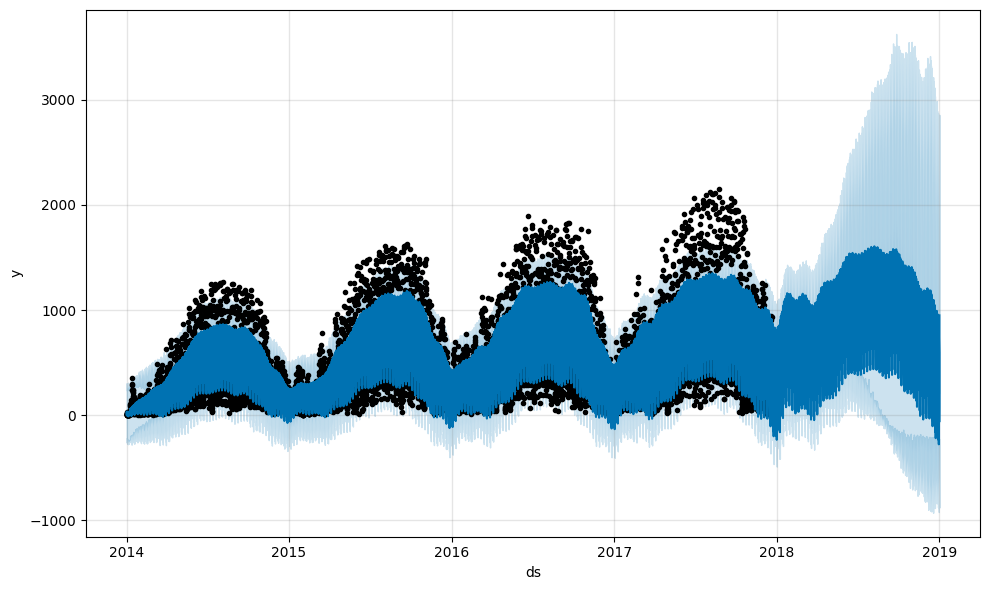

In [12]:
future2 = future[(future['ds'].dt.hour >= 8) &
                 (future['ds'].dt.hour < 18)]
forecast2 = model.predict(future2)
fig = model.plot(forecast2)
plt.show()

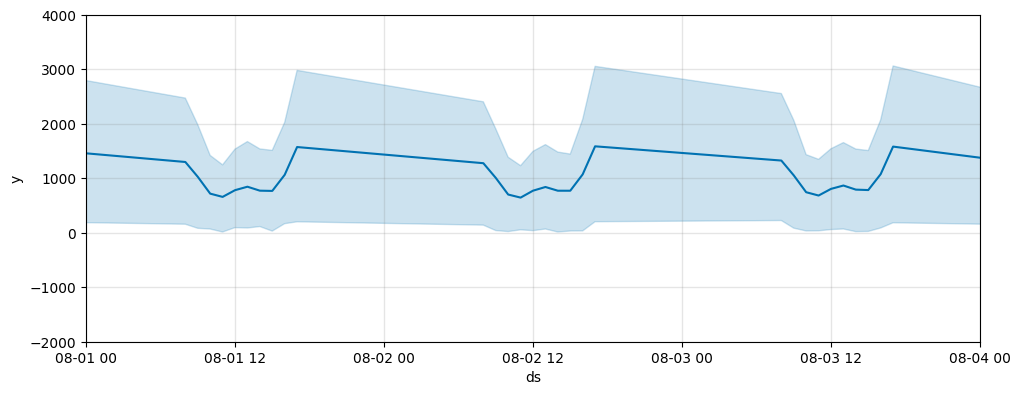

In [13]:
fig = model.plot(forecast2, figsize=(10,4))
plt.xlim(pd.to_datetime(['2018-08-01', '2018-08-04']))
plt.ylim(-2000, 4000)
plt.show()

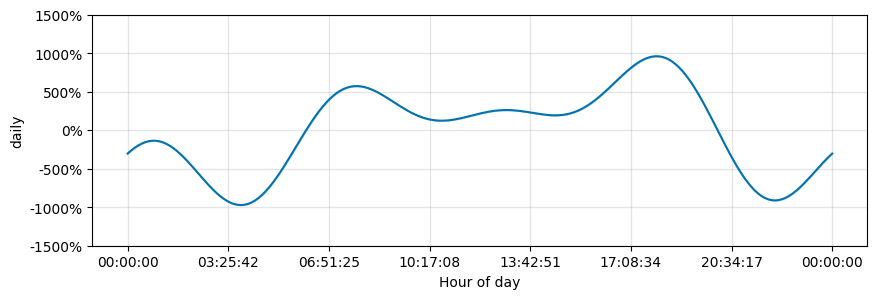

In [14]:
from prophet.plot import plot_seasonality
plot_seasonality(model, 'daily', figsize=(10,3))
plt.show()